# Running STIC for an ECOSTRESS Scene

This is an example of running the artificial neural network emulator of the Surface Temperature Initiated Closure (STIC) model corresponding to an ECOsystem Spaceborne Thermal Radiometer Experiment on Space Station (ECOSTRESS) scene.

In [1]:
from dateutil import parser
from matplotlib.colors import LinearSegmentedColormap
from solar_apparent_time import UTC_to_solar
import rasters as rt
from STIC_JPL import STIC_JPL
import logging
logging.disable(logging.CRITICAL)

Here's an example ECOSTRESS surface temperature scene.

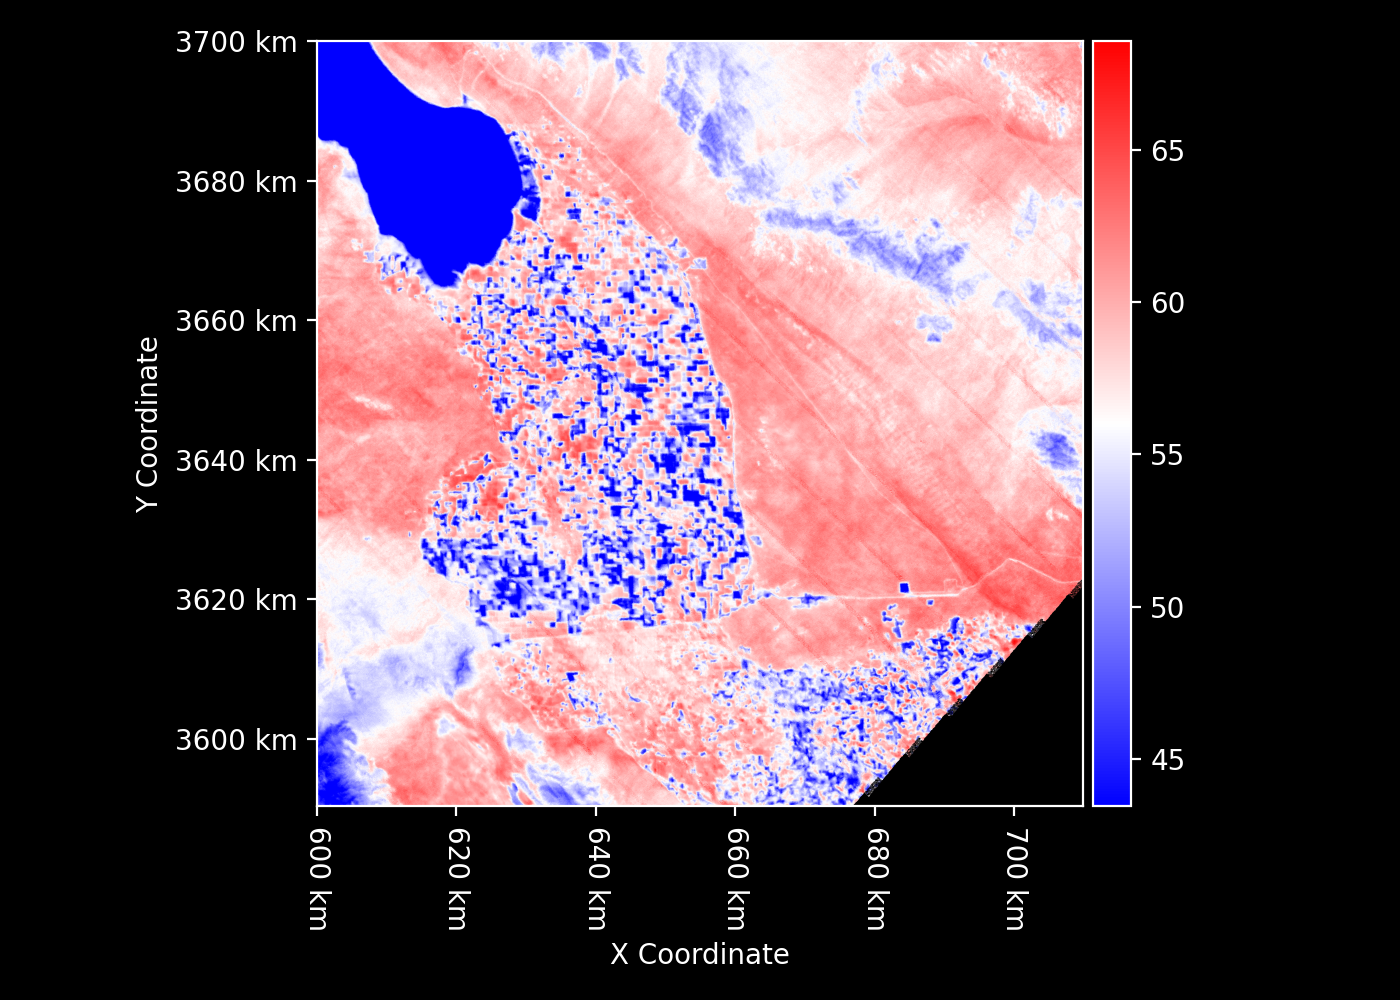

In [2]:
ST_filename = "ECOv002_L2T_LSTE_34366_004_11SPS_20240728T204025_0712_01_LST.tif"
ST_cmap = "bwr"
ST_C = rt.Raster.open(ST_filename, cmap=ST_cmap) - 273.15
ST_C

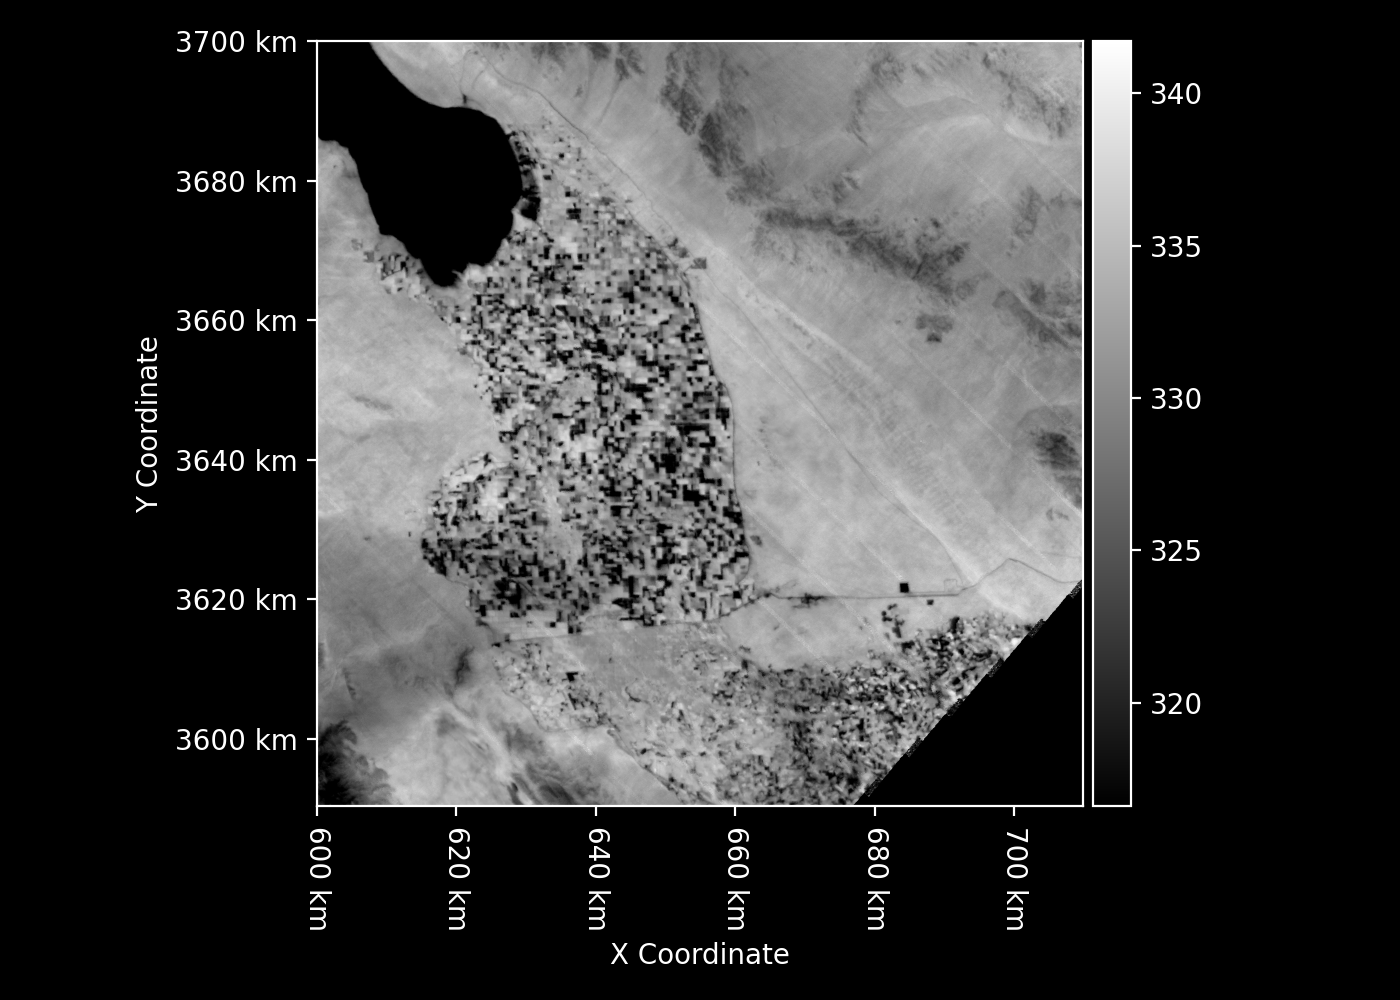

In [3]:
emissivity_filename = "ECOv002_L2T_LSTE_34366_004_11SPS_20240728T204025_0712_01_LST.tif"
emissivity_cmap = "gray"
emissivity = rt.Raster.open(ST_filename, cmap=emissivity_cmap)
emissivity

Let's get the acquisition time of the scene.

In [4]:
time_UTC = parser.parse(ST_filename.split("_")[6])
geometry = ST_C.geometry
longitude = geometry.centroid_latlon.x
latitude = geometry.centroid_latlon.y
time_solar = UTC_to_solar(time_UTC, longitude)
doy_solar = time_solar.timetuple().tm_yday
hour_of_day_solar = time_solar.hour + time_solar.minute / 60 + time_solar.second / 3600
print(f"{time_UTC:%Y-%m-%d %H:%M:%S} UTC")
print(f"{time_solar:%Y-%m-%d %H:%M:%S} solar apparent time at longitude {longitude}")
print(f"day of year {doy_solar} at longitude {longitude}")
print(f"hour of day {hour_of_day_solar} at longitude {longitude}")

2024-07-28 20:40:25 UTC
2024-07-28 12:59:02 solar apparent time at longitude -115.3433725031462
day of year 210 at longitude -115.3433725031462
hour of day 12.983888888888888 at longitude -115.3433725031462


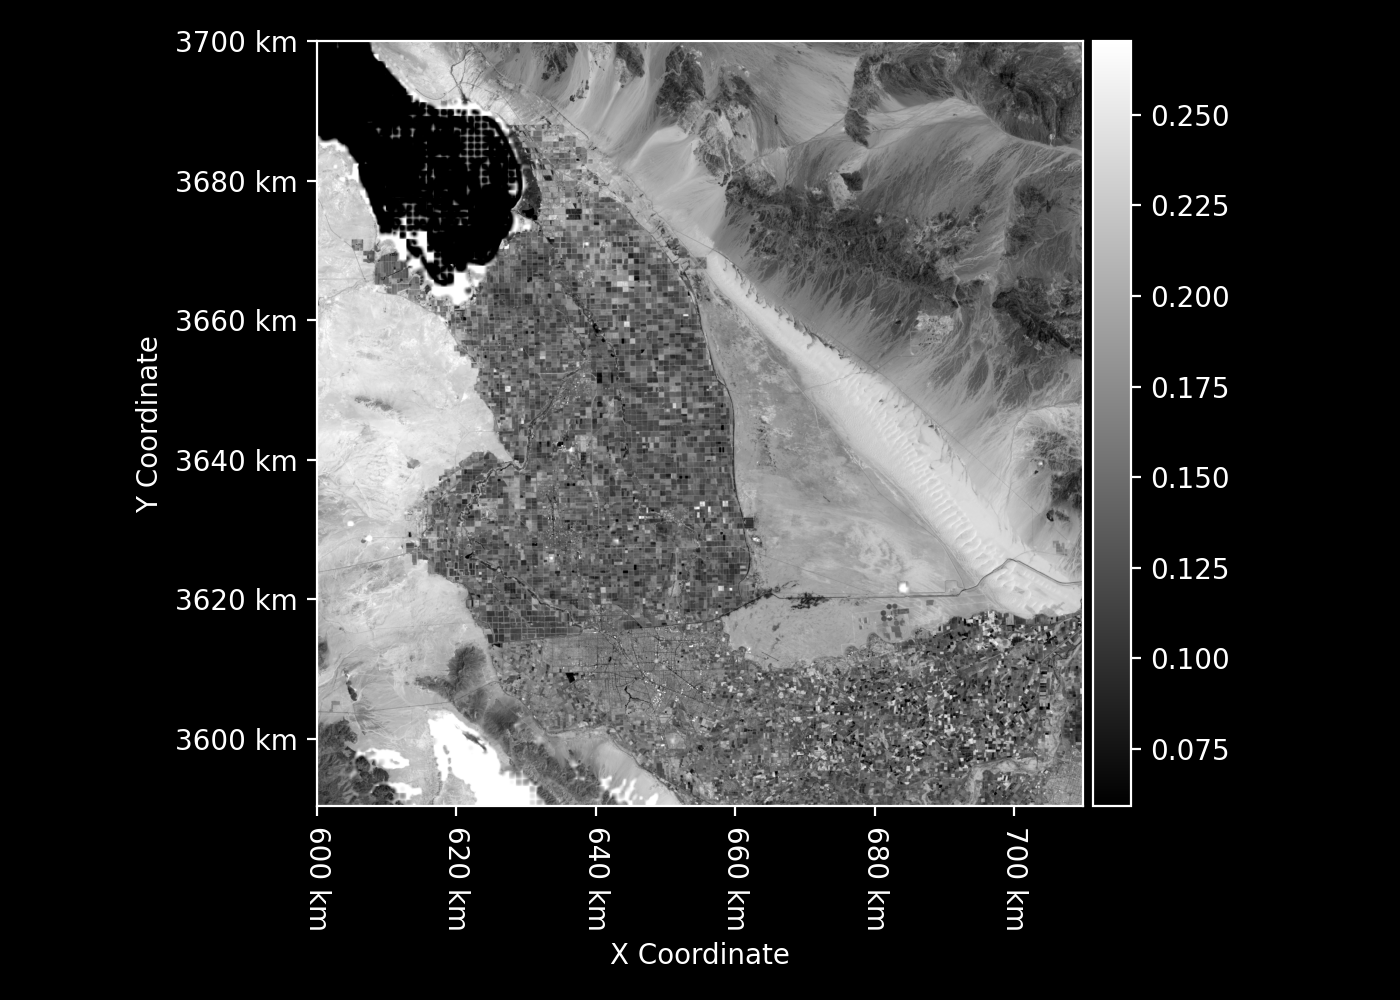

In [5]:
albedo_filename = "ECOv002_L2T_STARS_11SPS_20240728_0712_01_albedo.tif"
albedo_cmap = LinearSegmentedColormap.from_list(name="albedo", colors=["black", "white"])
albedo = rt.Raster.open(albedo_filename, cmap=albedo_cmap)
albedo

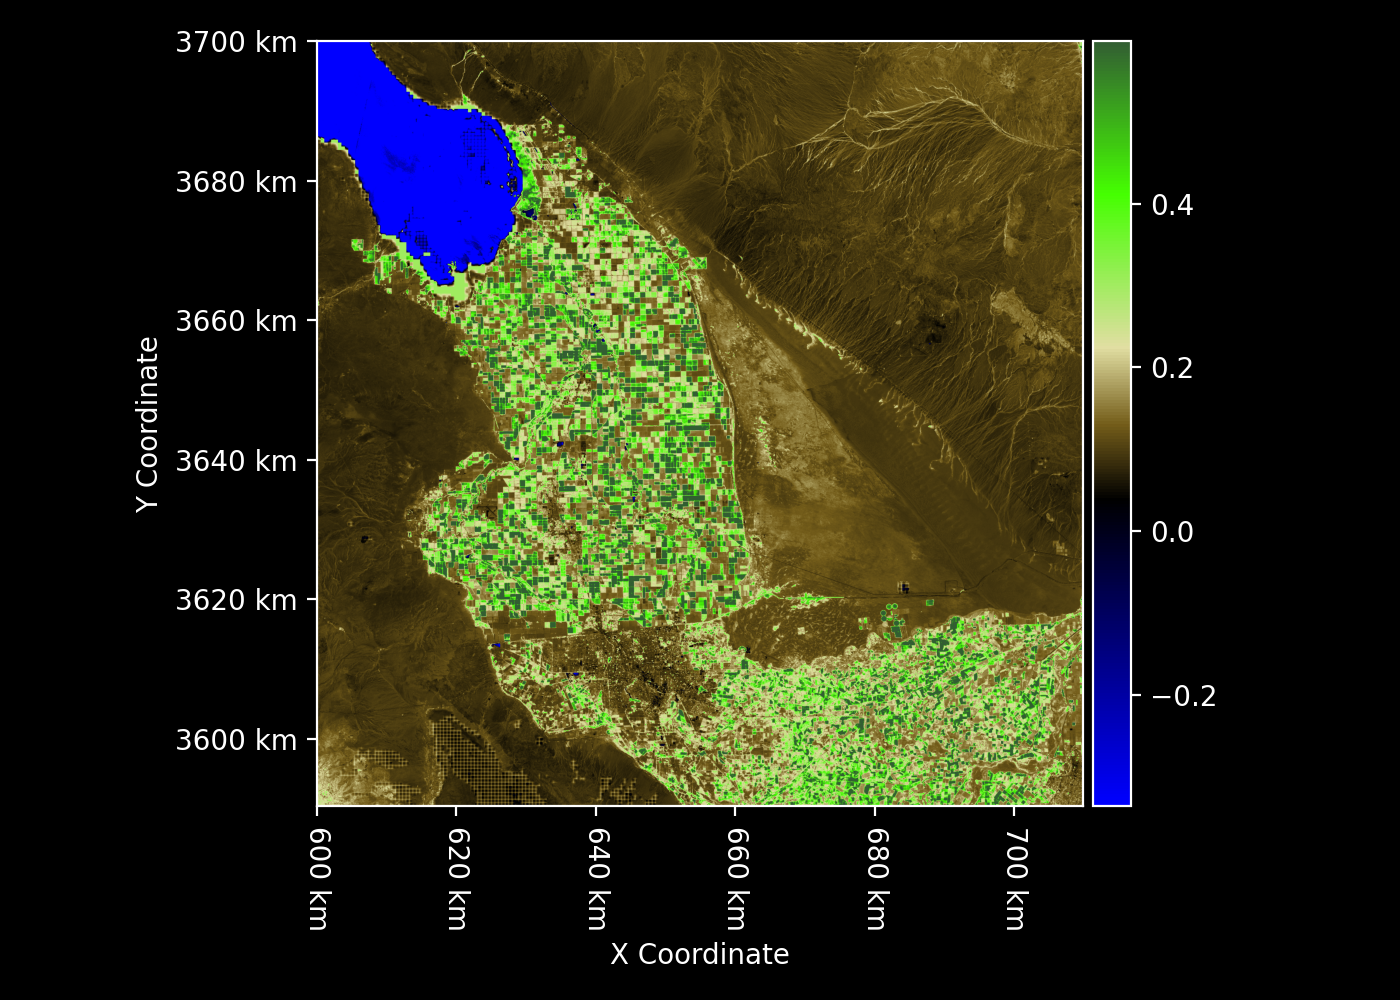

In [6]:
NDVI_filename = "ECOv002_L2T_STARS_11SPS_20240728_0712_01_NDVI.tif"
NDVI = rt. Raster.open(NDVI_filename)

NDVI_COLORMAP_ABSOLUTE = LinearSegmentedColormap.from_list(
    name="NDVI",
    colors=[
        (0, "#0000ff"),
        (0.4, "#000000"),
        (0.5, "#745d1a"),
        (0.6, "#e1dea2"),
        (0.8, "#45ff01"),
        (1, "#325e32")
    ]
)

NDVI.cmap = NDVI_COLORMAP_ABSOLUTE
NDVI

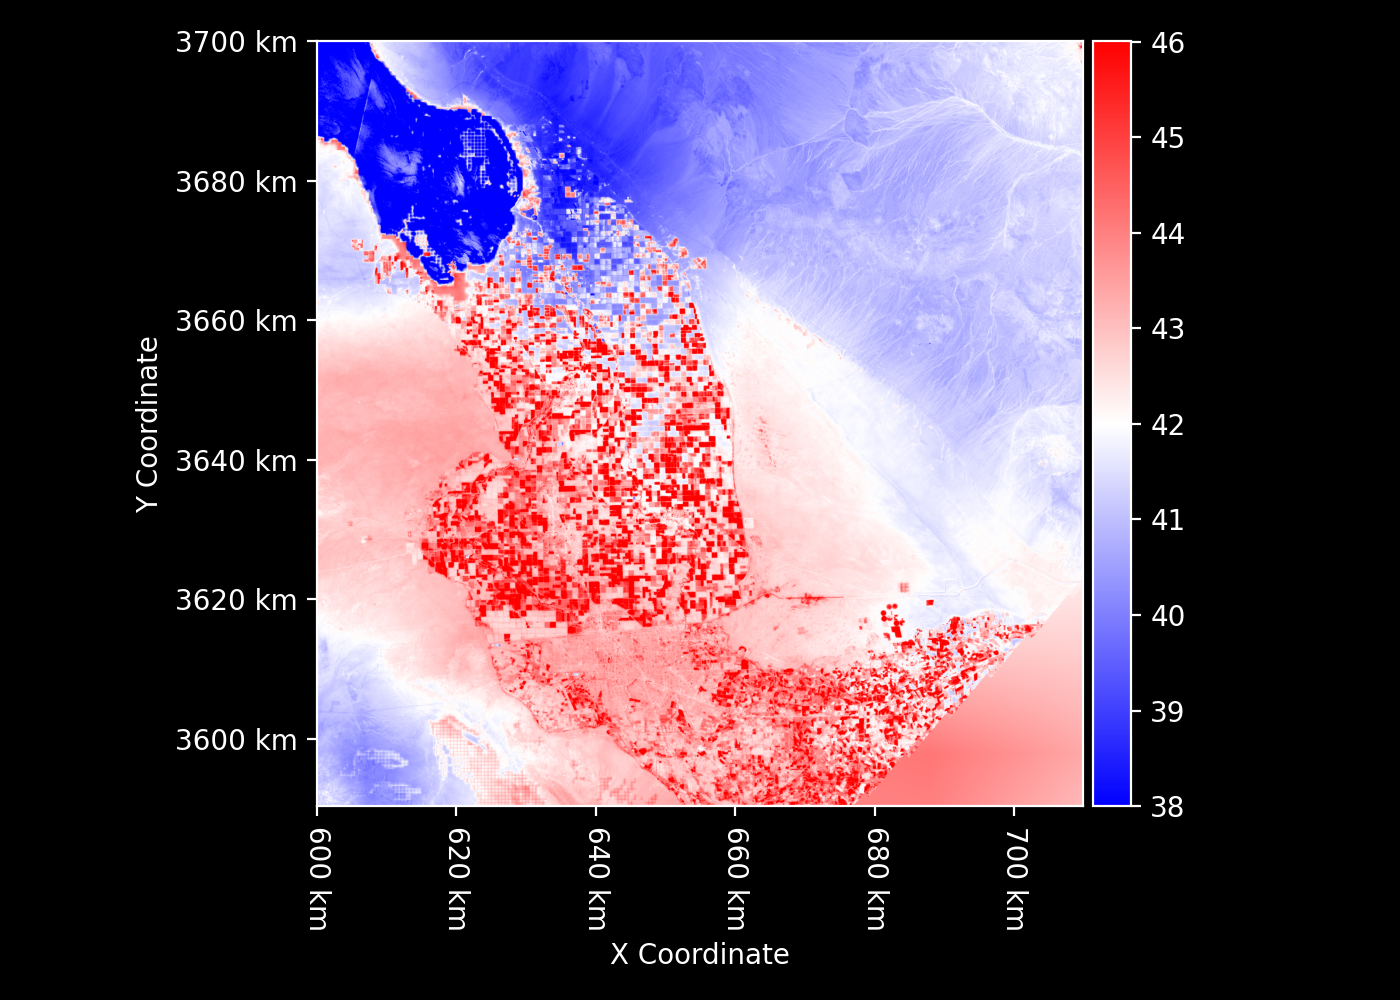

In [7]:
Ta_filename = "ECOv002_L3T_MET_34366_004_11SPS_20240728T204025_0712_01_Ta.tif"
Ta_C = rt.Raster.open(Ta_filename)
Ta_C.cmap = "bwr"
Ta_C

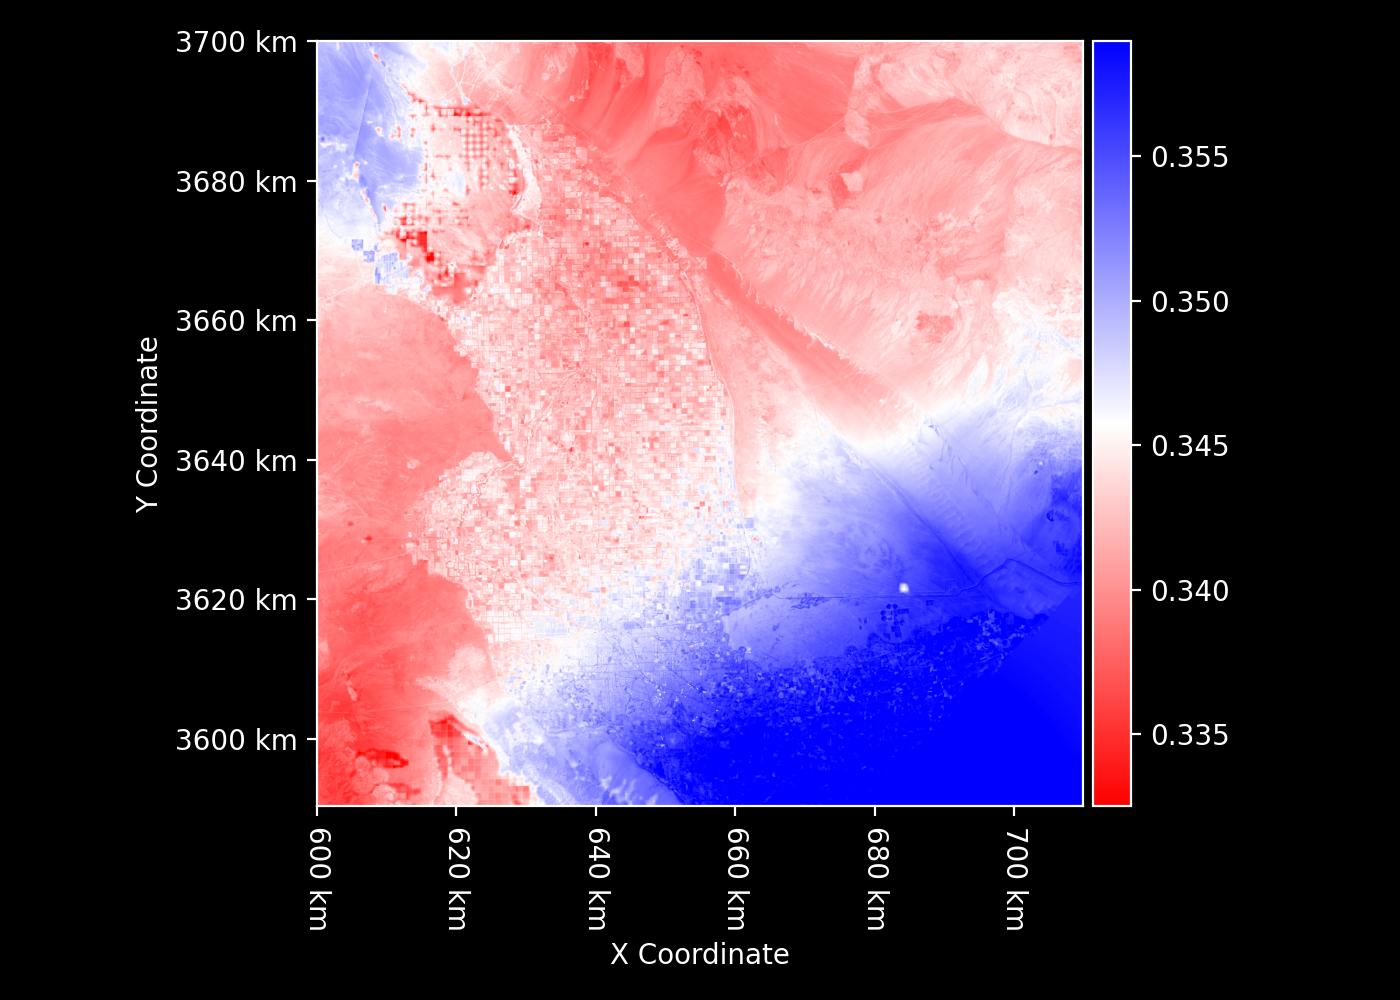

In [8]:
RH_filename = "ECOv002_L3T_MET_34366_004_11SPS_20240728T204025_0712_01_RH.tif"
RH = rt.Raster.open(RH_filename)
RH.cmap = "bwr_r"
RH

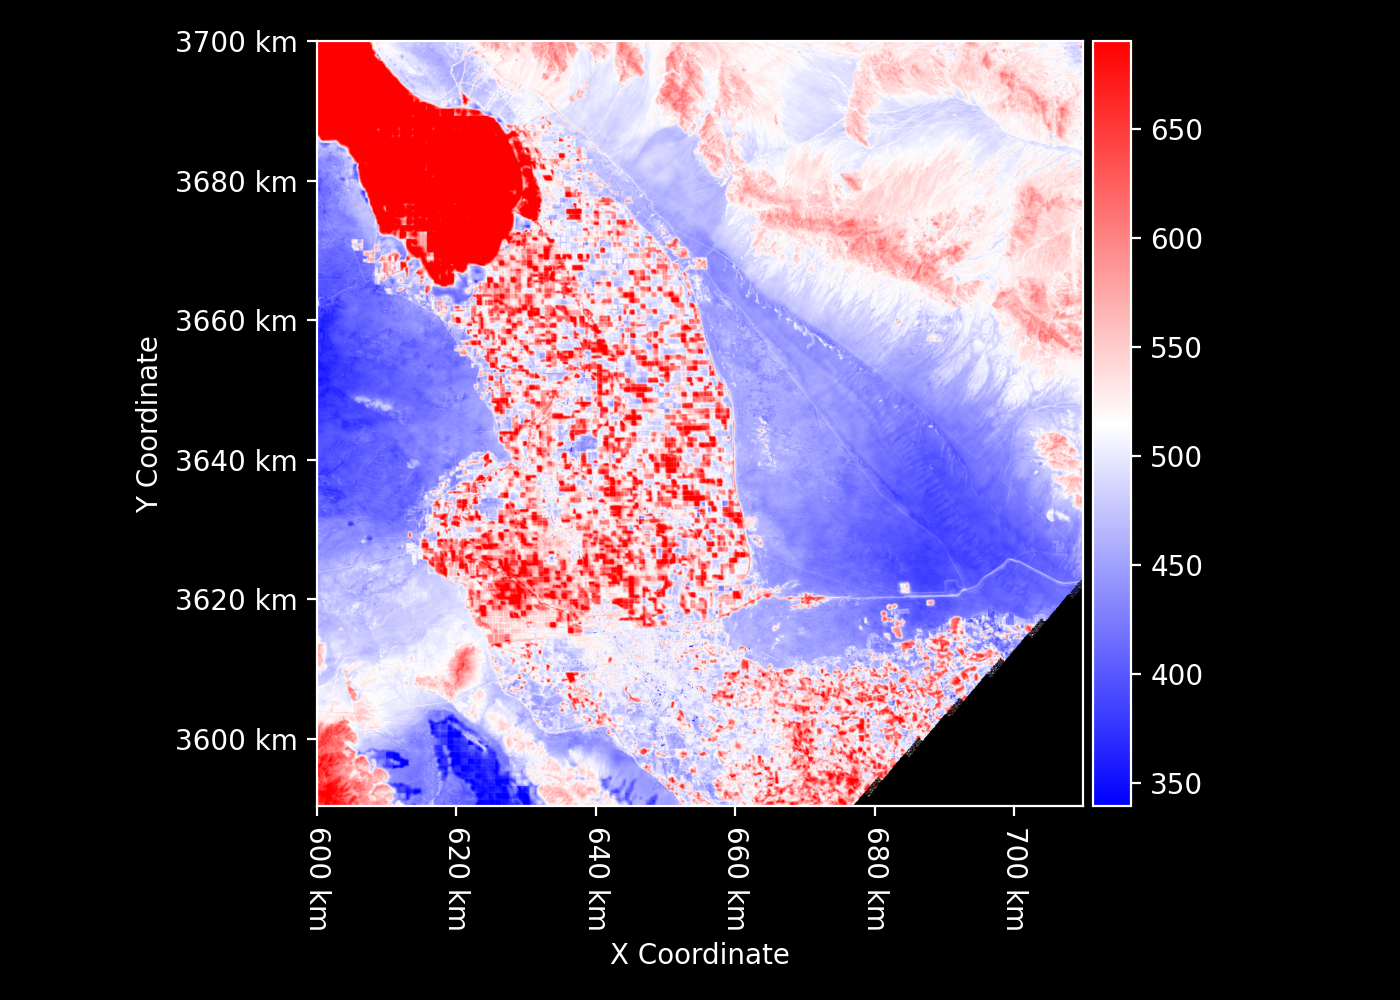

In [9]:
Rn_Wm2_filename = "ECOv002_L3T_SEB_34366_004_11SPS_20240728T204025_0712_01_Rn.tif"
Rn_Wm2 = rt.Raster.open(Rn_Wm2_filename)
Rn_Wm2.cmap = "bwr"
Rn_Wm2

In [10]:
STIC_results = STIC_JPL(
    geometry=geometry,
    time_UTC=time_UTC,
    ST_C=ST_C,
    emissivity=emissivity,
    NDVI=NDVI,
    albedo=albedo,
    Ta_C=Ta_C,
    RH=RH,
    Rn_Wm2=Rn_Wm2
)

/Users/halverso/Projects/STIC/STIC_JPL/STIC_JPL.py:108: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  SVP_hPa = 6.13753 * (np.exp((17.27 * Ta_C) / (Ta_C + 237.3)))
/Users/halverso/Projects/STIC/STIC_JPL/STIC_JPL.py:131: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Estar_hPa = 6.13753 * np.exp((17.27 * ST_C) / (ST_C + 237.3))
/Users/halverso/Projects/STIC/STIC_JPL/initialize_without_solar.py:62: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ms = rt.clip(rt.where((dTS < 0) & (Ms < 0) & (phi_Wm2 < 0), np.abs(Ms), Ms), 0, 1)
/Users/halverso/Projects/STIC/STIC_JPL/initialize_without_solar.py:69: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated 

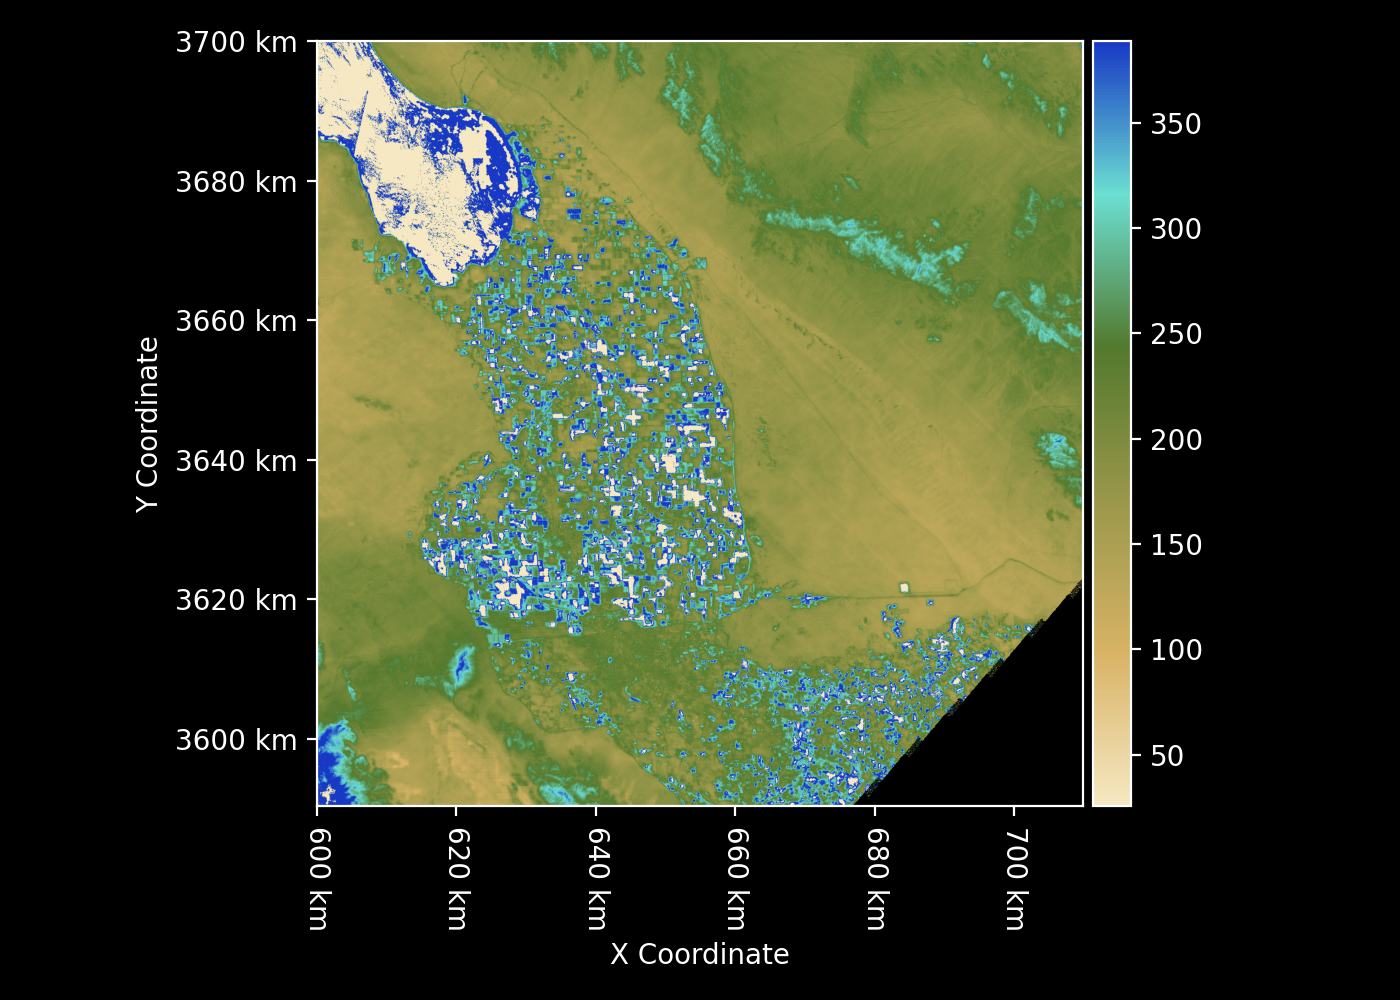

In [11]:
LE = STIC_results["LE"]
LE